In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import winsound
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from Python_Files.Methods import make_mi_scores, get_df_info, plot_mi_scores

In [2]:
df = pd.read_csv('../data/norm_data.csv')

df

,url,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,https://keepo.io/upate___,phishing,25,0,3.612879,0,0.000000,1,0,0,0,0,0,1.105643,0,0.030171
1,rr1---sn-g5cp3c5ob0o-jb3e.googlevideo.com,legitimate,41,0,4.104282,0,0.214286,2,0,5,0,0,1,0.212564,0,0.170769
2,http://webapps.accountverificationvbv.servenab...,phishing,61,0,4.334701,0,0.038462,3,0,0,0,1,2,0.524678,0,0.094003
3,http://secre.chasebnak.craicean.in,phishing,34,0,3.748940,0,0.000000,3,0,0,0,0,2,0.699114,0,0.019082
4,https://b8roau.webwave.dev,phishing,26,0,3.979098,0,0.050000,2,0,0,0,0,1,0.750085,0,0.044312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,http://fakesemo20.com/GOUV/rbc/cgi-bin/rbacces...,phishing,57,0,4.529720,0,0.045455,2,0,1,0,1,0,0.643463,0,0.094003
2499988,http://cksjw-a529d.web.app,phishing,26,0,4.132944,0,0.176471,2,0,1,0,0,1,0.750085,0,0.045454
2499989,https://rehabmedia.org/Linked,phishing,29,0,4.116265,0,0.000000,1,0,0,0,0,0,0.673621,0,0.037241
2499990,lianghecun.cn,legitimate,13,0,3.180833,0,0.000000,1,0,0,0,0,0,0.284649,0,0.007751


In [3]:
X = df.copy()
y = X.pop('label')

X.pop('url')

X

0                                  https://keepo.io/upate___
1                  rr1---sn-g5cp3c5ob0o-jb3e.googlevideo.com
2          http://webapps.accountverificationvbv.servenab...
3                         http://secre.chasebnak.craicean.in
4                                 https://b8roau.webwave.dev
                                 ...                        
2499987    http://fakesemo20.com/GOUV/rbc/cgi-bin/rbacces...
2499988                           http://cksjw-a529d.web.app
2499989                        https://rehabmedia.org/Linked
2499990                                        lianghecun.cn
2499991             frederickhealth--simpplr.visualforce.com
Name: url, Length: 2499992, dtype: object

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,25,0,3.612879,0,0.000000,1,0,0,0,0,0,1.105643,0,0.030171
1,41,0,4.104282,0,0.214286,2,0,5,0,0,1,0.212564,0,0.170769
2,61,0,4.334701,0,0.038462,3,0,0,0,1,2,0.524678,0,0.094003
3,34,0,3.748940,0,0.000000,3,0,0,0,0,2,0.699114,0,0.019082
4,26,0,3.979098,0,0.050000,2,0,0,0,0,1,0.750085,0,0.044312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499987,57,0,4.529720,0,0.045455,2,0,1,0,1,0,0.643463,0,0.094003
2499988,26,0,4.132944,0,0.176471,2,0,1,0,0,1,0.750085,0,0.045454
2499989,29,0,4.116265,0,0.000000,1,0,0,0,0,0,0.673621,0,0.037241
2499990,13,0,3.180833,0,0.000000,1,0,0,0,0,0,0.284649,0,0.007751


In [4]:
y

0            phishing
1          legitimate
2            phishing
3            phishing
4            phishing
              ...    
2499987      phishing
2499988      phishing
2499989      phishing
2499990    legitimate
2499991    legitimate
Name: label, Length: 2499992, dtype: object

In [5]:
discrete_features = X.dtypes == int

discrete_features

url_length             True
starts_with_ip         True
url_entropy           False
has_punycode           True
digit_letter_ratio    False
dot_count              True
at_count               True
dash_count             True
tld_count              True
domain_has_digits      True
subdomain_count        True
nan_char_entropy      False
has_internal_links     True
domain_age_days       False
dtype: bool

In [6]:
mi_scores = make_mi_scores(X, y, discrete_features)
winsound.Beep(1000, 500)

In [7]:
mi_scores

nan_char_entropy      0.693898
url_entropy           0.426656
url_length            0.382152
domain_age_days       0.347633
digit_letter_ratio    0.151031
dot_count             0.063978
dash_count            0.044387
subdomain_count       0.023094
has_internal_links    0.016745
tld_count             0.016745
domain_has_digits     0.010058
starts_with_ip        0.007466
at_count              0.006798
has_punycode          0.000104
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

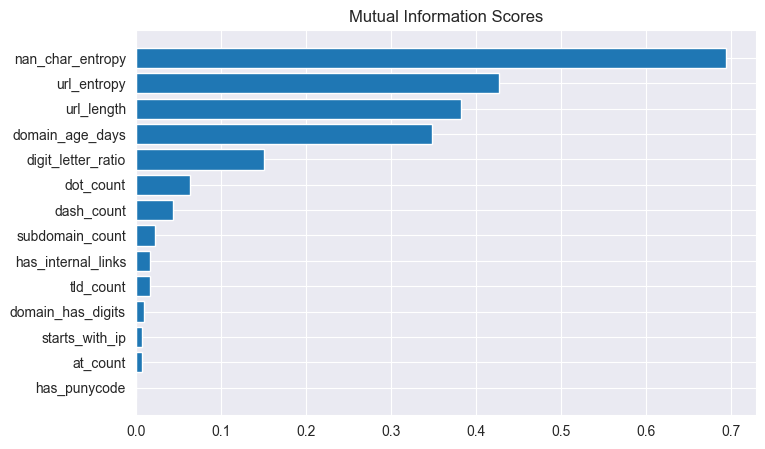

In [8]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

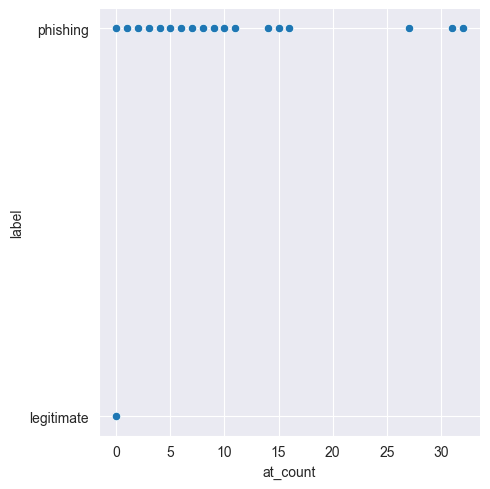

In [9]:
sns.relplot(x='at_count', y='label', data=df)

In [10]:
get_df_info(df)


Shape of DataFrame: (2499992, 16)

Columns in DataFrame: ['url', 'label', 'url_length', 'starts_with_ip', 'url_entropy', 'has_punycode', 'digit_letter_ratio', 'dot_count', 'at_count', 'dash_count', 'tld_count', 'domain_has_digits', 'subdomain_count', 'nan_char_entropy', 'has_internal_links', 'domain_age_days']

Data types of columns:
 url                    object
label                  object
url_length              int64
starts_with_ip          int64
url_entropy           float64
has_punycode            int64
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits       int64
subdomain_count         int64
nan_char_entropy      float64
has_internal_links      int64
domain_age_days       float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499992 entries, 0 to 2499991
Data columns (total 16 columns):
 #   Column              

,count,mean,std,min,25%,50%,75%,max
url_length,2499992.0,45.875977,74.151583,4.000000,17.000000,29.000000,52.000000,25523.000000
starts_with_ip,2499992.0,0.010687,0.102825,0.000000,0.000000,0.000000,0.000000,1.000000
url_entropy,2499992.0,3.907980,0.635715,0.100836,3.452820,3.911860,4.329283,6.048781
has_punycode,2499992.0,0.000840,0.028978,0.000000,0.000000,0.000000,0.000000,1.000000
digit_letter_ratio,2499992.0,0.116857,0.245145,0.000000,0.000000,0.000000,0.133333,20.840000
dot_count,2499992.0,2.174578,1.736377,0.000000,1.000000,2.000000,3.000000,211.000000
at_count,2499992.0,0.011416,0.140731,0.000000,0.000000,0.000000,0.000000,32.000000
dash_count,2499992.0,0.741024,1.662581,0.000000,0.000000,0.000000,1.000000,322.000000
tld_count,2499992.0,0.039229,0.390500,0.000000,0.000000,0.000000,0.000000,65.000000
domain_has_digits,2499992.0,0.109398,0.312138,0.000000,0.000000,0.000000,0.000000,1.000000
